<a href="https://colab.research.google.com/github/yogapatangga/MachineLearningTasks/blob/main/2ndWeekTasks/Basis_Function_Financial_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basis Function (Financial Market Data)
## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the dataset from CSV and display the first few rows

In [2]:
data = pd.read_csv('FinancialMarket.csv')
print(data.head())

         x  combined_data
0  0.00000       0.003073
1  0.01001       0.033492
2  0.02002      -0.027269
3  0.03003       0.176319
4  0.04004      -0.006027


## Extract the x and combined data columns

In [3]:
x = data['x'].values
combined_data = data['combined_data'].values

## Visualize the dataset

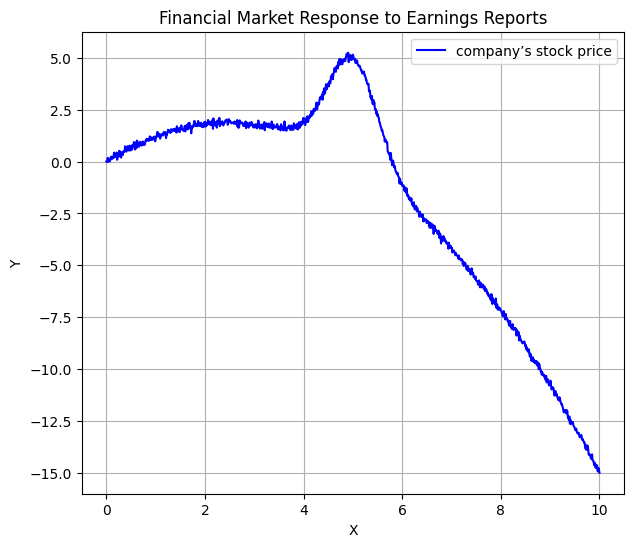

In [4]:
plt.figure(figsize=(7, 6))
plt.title('Financial Market Response to Earnings Reports')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.plot(x, combined_data, label='company’s stock price', color='blue')
plt.legend()  # Ensure there's a label to show in the legend
plt.show()

## Define Gaussian Basis Function

In [5]:
def gaussian_basis(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))

Gaussian Basis Function Formula
$$
\phi(x) = \exp\left( -\frac{(x - \mu)^2}{2s^2} \right)
$$

- $\phi(x)$: The value of the Gaussian basis function at input $x$.

- $x$: The input data point or independent variable.

- $\mu$: The mean or center of the Gaussian function, determining where the peak occurs.

- $s$: The standard deviation (spread) of the Gaussian function, controlling the width of the curve.

- $\exp$: The exponential function $e^{\,\cdot\,}$.

- $-\frac{(x - \mu)^2}{2s^2}$: The exponent in the exponential function, representing the negative squared distance between $x$ and $\mu$, normalized by $2s^2$.


## Training the Vanilla Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
X_test = x.reshape(-1, 1)
Y_test = combined_data.reshape(-1, 1)
vanilla_model = LinearRegression().fit(X_test, Y_test)
y_pred_vanilla = vanilla_model.predict(X_test)

## Training the Gaussian Basis Function Linear Regression

In [7]:
mu = np.linspace(1, 5, 20)  # center points for the Gaussian functions
s = 1.5  # width of the Gaussian functions
X_gauss = np.hstack([gaussian_basis(X_test, m, s) for m in mu])
gaussian_model = LinearRegression().fit(X_gauss, Y_test)
y_pred_gauss = gaussian_model.predict(X_gauss)

## Visualising the Linear Regression results

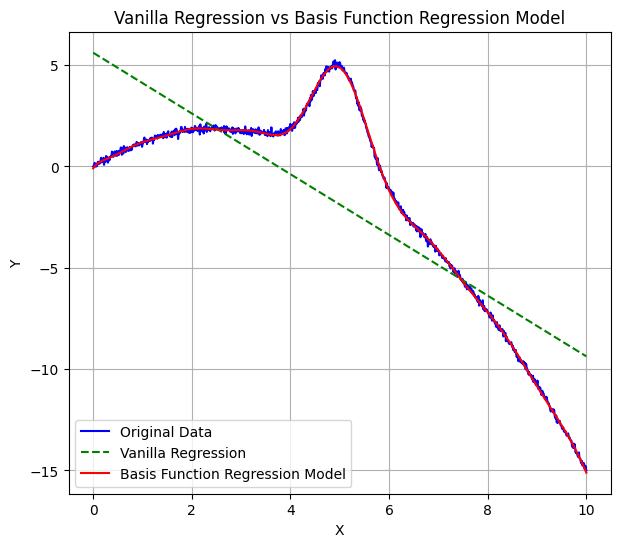

In [8]:
plt.figure(figsize=(7, 6))
plt.plot(x, combined_data, color='blue', label='Original Data')
plt.plot(X_test, y_pred_vanilla, color='green', label='Vanilla Regression', linestyle='dashed')
plt.plot(X_test, y_pred_gauss, color='red', label='Basis Function Regression Model')
plt.title('Vanilla Regression vs Basis Function Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## Compare the MSE, RMSE, and R²

Mean Squared Error (MSE) Formula
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- $\text{MSE}$: Mean Squared Error, a metric that calculates the average of the squared differences between actual and predicted values.

- $n$: The total number of observations or data points in the dataset.

- $\sum_{i=1}^{n}$: Summation over all data points from $i = 1$ to $n$.

- $y_i$: The actual value for the $i$-th observation.

- $\hat{y}_i$: The predicted value for the $i$-th observation, generated by the model.

- $(y_i - \hat{y}_i)^2$: The squared difference between the actual value $y_i$ and the predicted value $\hat{y}_i$.


Root Mean Squared Error (RMSE) Formula

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

- calculate the square root of $\text{MSE}$ value that we have obtained before.

In [22]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
mse_vanilla = mean_squared_error(Y_test, vanilla_model.predict(X_test))
rmse_vanilla = root_mean_squared_error(Y_test, vanilla_model.predict(X_test))
r2_vanilla = r2_score(Y_test, vanilla_model.predict(X_test))
mse_gauss = mean_squared_error(Y_test, gaussian_model.predict(X_gauss))
rmse_gauss = root_mean_squared_error(Y_test, gaussian_model.predict(X_gauss))
r2_gauss = r2_score(Y_test, gaussian_model.predict(X_gauss))
print("Vanilla Regression\nMSE :", mse_vanilla, "\nRMSE:", rmse_vanilla,"\nR²  :", r2_vanilla)
print("\nBasis Function Regression Model\nMSE :", mse_gauss, "\nRMSE:", rmse_gauss,"\nR²  :", r2_gauss)

Vanilla Regression
MSE : 9.887619132900994 
RMSE: 3.144458480072681 
R²  : 0.6547481050711528

Basis Function Regression Model
MSE : 0.012124979288566992 
RMSE: 0.11011348368191333 
R²  : 0.9995766248659982
